In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
meddata = pd.read_csv("../input/insurance/insurance.csv")
meddata.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
meddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
meddata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='sex', ylabel='charges'>

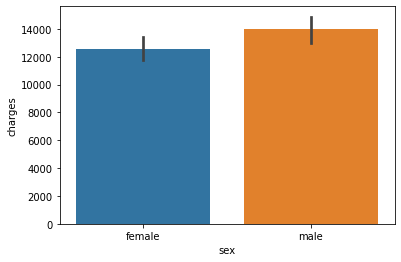

In [5]:
sns.barplot(x = 'sex', y ='charges', data = meddata)

<AxesSubplot:xlabel='sex', ylabel='charges'>

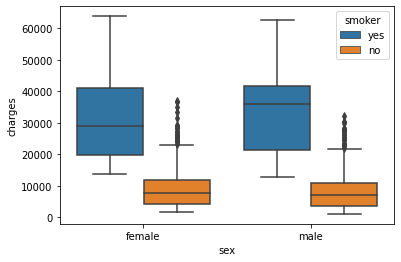

In [6]:
sns.boxplot(x= 'sex', y='charges', hue='smoker', data = meddata)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

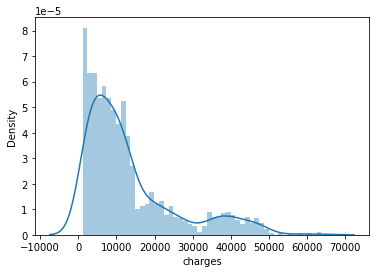

In [7]:
sns.distplot(meddata['charges'], bins = 50)

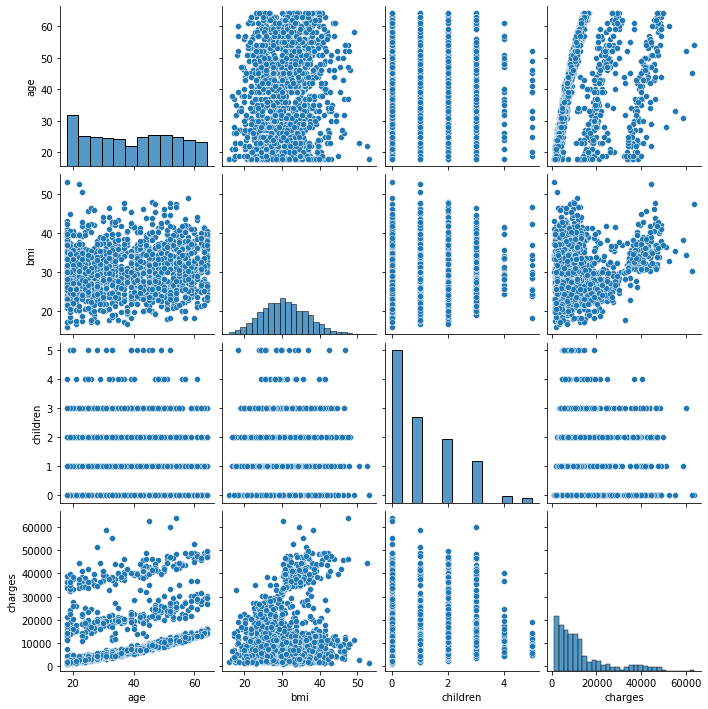

In [8]:
sns.pairplot(meddata)

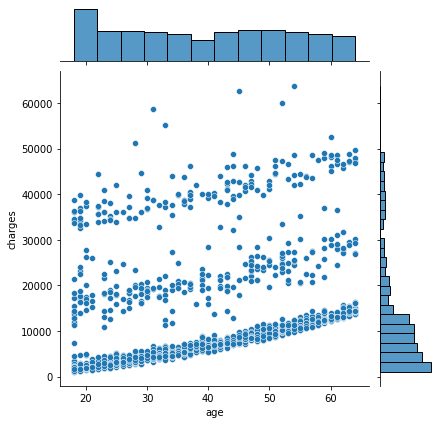

In [9]:
sns.jointplot(x = 'age', y = 'charges', data = meddata)

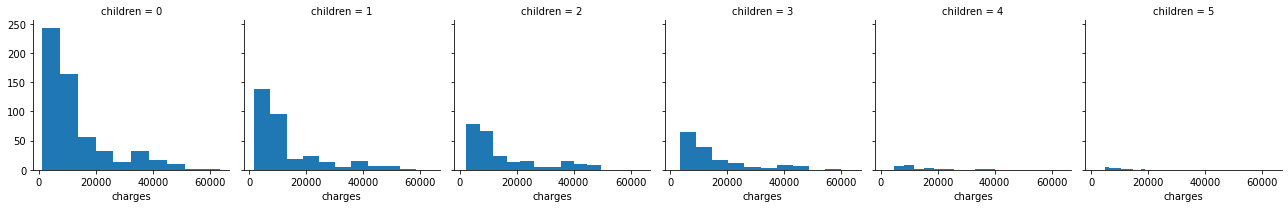

In [10]:
fgmap = sns.FacetGrid(meddata, col ='children')
fgmap.map(plt.hist, 'charges')

In [11]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(handle_unknown = 'ignore', dtype = int)
regions = [['southeast',0],['southwest',1],['northeast',2],['northwest',3]]
one.fit(regions)
print(one.transform(regions).toarray())

[[0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 1]]


In [12]:
def regions_meddata(r):
    if r == 'southeast':
        return(one.transform(regions).toarray()[0].tolist())
    if r == 'southwest':
        return(one.transform(regions).toarray()[1].tolist())
    if r == 'northeast':
        return(one.transform(regions).toarray()[2].tolist())
    if r == 'northwest':
        return(one.transform(regions).toarray()[3].tolist())
    else:
        return([0])
meddata['regionsohe'] = meddata['region'].apply(regions_meddata)

In [13]:
meddata.head()

,age,sex,bmi,children,smoker,region,charges,regionsohe
0,19,female,27.900,0,yes,southwest,16884.92400,"[0, 0, 0, 1, 0, 1, 0, 0]"
1,18,male,33.770,1,no,southeast,1725.55230,"[0, 0, 1, 0, 1, 0, 0, 0]"
2,28,male,33.000,3,no,southeast,4449.46200,"[0, 0, 1, 0, 1, 0, 0, 0]"
3,33,male,22.705,0,no,northwest,21984.47061,"[0, 1, 0, 0, 0, 0, 0, 1]"
4,32,male,28.880,0,no,northwest,3866.85520,"[0, 1, 0, 0, 0, 0, 0, 1]"


In [14]:
meddata.drop('region', axis = 1, inplace = True)
meddata.head()

,age,sex,bmi,children,smoker,charges,regionsohe
0,19,female,27.900,0,yes,16884.92400,"[0, 0, 0, 1, 0, 1, 0, 0]"
1,18,male,33.770,1,no,1725.55230,"[0, 0, 1, 0, 1, 0, 0, 0]"
2,28,male,33.000,3,no,4449.46200,"[0, 0, 1, 0, 1, 0, 0, 0]"
3,33,male,22.705,0,no,21984.47061,"[0, 1, 0, 0, 0, 0, 0, 1]"
4,32,male,28.880,0,no,3866.85520,"[0, 1, 0, 0, 0, 0, 0, 1]"


In [15]:
region2 = pd.DataFrame(meddata)
region2[['reg0','reg1','reg2','reg3','reg4','reg5','reg6','reg7']] = pd.DataFrame(region2.regionsohe.tolist(),index = region2.index)
region2.drop('regionsohe',axis =1, inplace = True)
region2.head()

,age,sex,bmi,children,smoker,charges,reg0,reg1,reg2,reg3,reg4,reg5,reg6,reg7
0,19,female,27.900,0,yes,16884.92400,0,0,0,1,0,1,0,0
1,18,male,33.770,1,no,1725.55230,0,0,1,0,1,0,0,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0,1,0,0,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0,0,0,0,1
4,32,male,28.880,0,no,3866.85520,0,1,0,0,0,0,0,1


In [16]:
meddata = pd.DataFrame(region2)
meddata.head()

,age,sex,bmi,children,smoker,charges,reg0,reg1,reg2,reg3,reg4,reg5,reg6,reg7
0,19,female,27.900,0,yes,16884.92400,0,0,0,1,0,1,0,0
1,18,male,33.770,1,no,1725.55230,0,0,1,0,1,0,0,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0,1,0,0,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0,0,0,0,1
4,32,male,28.880,0,no,3866.85520,0,1,0,0,0,0,0,1


In [17]:
def binary_val(r):
    if (r=='female'):
        return 1
    if (r == 'yes'):
        return 1
    else:
        return 0
meddata['sex']= meddata['sex'].apply(binary_val)
meddata['smoker'] = meddata['smoker'].apply(binary_val)

In [18]:
meddata.head()

,age,sex,bmi,children,smoker,charges,reg0,reg1,reg2,reg3,reg4,reg5,reg6,reg7
0,19,1,27.900,0,1,16884.92400,0,0,0,1,0,1,0,0
1,18,0,33.770,1,0,1725.55230,0,0,1,0,1,0,0,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0,1,0,0,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0,0,0,0,1
4,32,0,28.880,0,0,3866.85520,0,1,0,0,0,0,0,1


In [19]:
X = meddata.drop('charges',axis =1)
y = meddata['charges']

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [21]:
X_train.head()

,age,sex,bmi,children,smoker,reg0,reg1,reg2,reg3,reg4,reg5,reg6,reg7
560,46,1,19.95,2,0,0,1,0,0,0,0,0,1
1285,47,1,24.32,0,0,1,0,0,0,0,0,1,0
1142,52,1,24.86,0,0,0,0,1,0,1,0,0,0
969,39,1,34.32,5,0,0,0,1,0,1,0,0,0
486,54,1,21.47,3,0,0,1,0,0,0,0,0,1


In [22]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [23]:
model2 = tf.keras.Sequential([
       tf.keras.Input(shape = (13,)),
       tf.keras.layers.Dense(100,activation = 'relu'),
       tf.keras.layers.Dense(50,activation = 'relu'),
       tf.keras.layers.Dense(50, activation = 'relu'),
       tf.keras.layers.Dense(1,activation = None)
])

model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae']
             
)

model2.fit(X_train,y_train, epochs = 100)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13320.3203 - mae: 13320.3203
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13093.5879 - mae: 13093.5879
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11886.6963 - mae: 11886.6963
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8760.0107 - mae: 8760.0107
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7501.0981 - mae: 7501.0981
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7439.5552 - mae: 7439.5552
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7399.8652 - mae: 7399.8652
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7364.1626 - mae: 7364.1626
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7330.4204 - mae: 7330.4204
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7287.8062 - mae: 728

In [24]:
model2.evaluate(X_train,y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3157.9939 - mae: 3157.9939


[3157.993896484375, 3157.993896484375]

In [25]:
model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2878.9363 - mae: 2878.9363


[2878.936279296875, 2878.936279296875]

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model2,show_shapes = True)
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 9,051
Trainable params: 9,051
Non-trainable params: 0
_________________________________________________________________


In [27]:
y_preds = model2.predict(X_test)

In [28]:
tf.metrics.mean_absolute_error(y_true = y_test, y_pred= y_preds)

<tf.Tensor: shape=(268,), dtype=float32, numpy=
array([ 8597.872 ,  9142.488 , 30056.58  ,  8606.569 , 17548.031 ,
        9116.325 , 11288.155 ,  9779.78  ,  9962.428 ,  8717.255 ,
       20952.158 ,  8690.125 ,  9788.468 , 27695.938 , 30422.312 ,
       27096.938 ,  8719.696 , 26571.703 ,  8595.449 , 23838.172 ,
        9254.978 ,  8659.198 , 11671.742 , 10232.232 ,  8846.073 ,
        8826.008 ,  9229.948 ,  9134.532 ,  8634.17  , 11982.501 ,
        8591.329 ,  9018.6455, 11076.609 ,  9038.636 , 10382.539 ,
        8622.344 , 10769.708 ,  8678.415 , 26489.639 , 23161.852 ,
        9349.149 , 10580.83  ,  8995.239 ,  9082.41  ,  9283.791 ,
        9109.768 ,  9924.856 ,  9605.852 , 25960.887 ,  9445.548 ,
        9671.864 , 11577.229 ,  8664.886 , 11488.344 ,  8781.2295,
        8696.642 ,  9891.138 , 22509.014 ,  9017.033 ,  8765.197 ,
        9609.498 ,  9196.096 ,  9860.538 ,  8606.976 ,  8704.059 ,
        9673.342 , 18907.338 ,  8830.49  , 10077.106 , 10658.342 ,
        8862.0